## 3.평가

### 3.1 정확도
데이터 레이블의 불균형이 심한 경우 정확도가 떨어질 수 있다


In [8]:
from sklearn.base import BaseEstimator
# 에스티메이터가 가져야할 기본적인 게 들어있는 거

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [5]:
# 학습은 안 하는데(빈 함수) 예측만 하는(여자면 생존 남자는 사망) 모델
class MyDummyClassifier(BaseEstimator): # 파이썬 클래스 이름은 자바에서 이름 붙일때처럼 단어의 첫글자는 대문자로..
    def fit (self, X, y=None): # ??? self는 자기 주소값을 받는댜. 뭔소리지.. 만들떄만 필요하고 함수 사용할 때는 뭐 넣어주는 거 아님
        pass # 건너뛰겠따? 뭘요?????????? 아 줄맞춤 해주느라고 써준거?
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred
                

In [6]:
# 타이타닉 데이터 또 갖다 쓸 때를 댇비해서 함수 만들어놓기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) 
    df['Cabin'].fillna('N', inplace=True) 
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df


def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


???????????? 뭐한거져ㅛ

In [9]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test, pred)

0.8324022346368715

데이터가 답이 한쪽으로 치우쳐진 경우
학습도 안 시켰는데 예측치가 83프로나 나옴!
이건 정확도만 가지고 평가할 수 있는 게 아니다


### 3.2 오차 행렬
맞추면 츄르 못맞추면 false
예측클래스를 예측을 0이라고 해서 맞췄으면 네거티브, 1이라고 해서 맞췄으면 포지티브
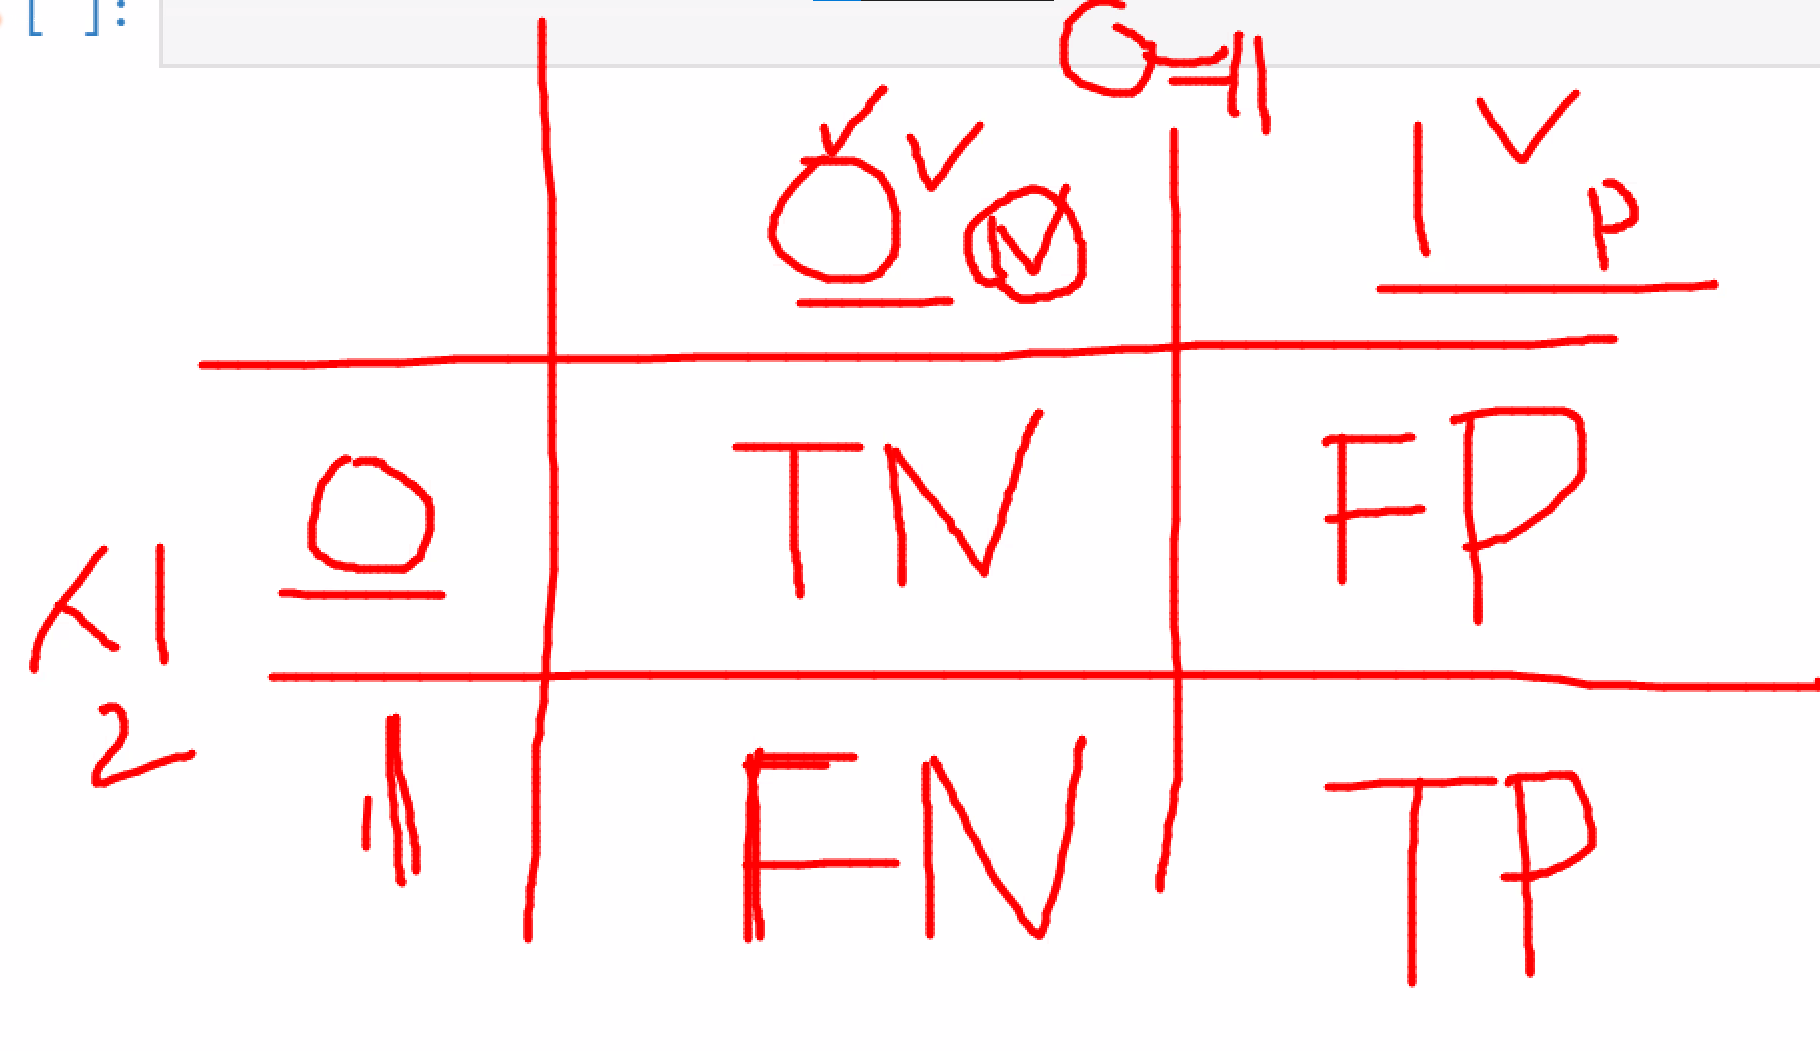

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
confusion_matrix(y_test, pred)

#TN, FP, FN, TP 값이 얼마나 나오냐.. 를 보고 평가한다

array([[103,  15],
       [ 15,  46]], dtype=int64)

### 3.3 정밀도와 재현율
정확도: 맞춘 건수/ 전체건수  
정밀도: 1이라고 예측한 값에서 몇건이나 맞았나. 예측값 1 기준. 예측한 것 중에 얼마나 맞췄나  
재현율: 실제건(실제건맞춤+실제건못맞춤) 중에 실제 맞춘 거. 실제건 1 기준. 실제값중에 얼마나 맞추었냐 

정밀도와 재현율은 반비례한다. 한쪽으로 치우치지 않게 해야.. 경우에따라 정밀도가 중요할 수도 있고, 재현율이 중요할 수도 있다.